# Analayse Shannon diversity index and Faith's phylogenetic index change in time

This Jupyter Notebook contains main functions to visualize alpha diversity change in time.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from skbio.diversity import alpha
import random 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

warnings.filterwarnings('ignore')
sns.set_style('white')

# I. SHANNON DIVERSITY INDEX

In [2]:
wd =  './data/alpha_diversity/shannon/'

male_alpha_df = pd.read_csv(wd + 'male_shannon_entropy.csv')
female_alpha_df = pd.read_csv(wd + 'female_shannon_entropy.csv')
donorA_alpha_df = pd.read_csv(wd + 'donorA_shannon_entropy.csv')
donorB_alpha_df = pd.read_csv(wd + 'donorB_shannon_entropy.csv')

datasets = [male_alpha_df, female_alpha_df, donorA_alpha_df, donorB_alpha_df]
subjects = ['male', 'female', 'donorA', 'donorB']

In [3]:
def get_trend(alpha_div_df):
    
    X = alpha_div_df.index.values.reshape(len(alpha_div_df), 1)
    X = sm.add_constant(X)
    y = alpha_div_df.values
    model = sm.OLS(y,X).fit()
    trend_coeff = np.round(model.params[1], 3)
    trend_pvalue = np.round(model.pvalues[1], 3)
    
    trend = model.predict()
    
    return trend, [trend_coeff, trend_pvalue]

In [4]:
male_trend, male_trend_coef = get_trend(male_alpha_df)
female_trend1, female_trend_coef1 = get_trend(female_alpha_df.iloc[:60])
female_trend2, female_trend_coef2 = get_trend(female_alpha_df.iloc[60:])
female_trend_df = pd.DataFrame(female_trend1).append(pd.DataFrame(female_trend2))
female_trend_df.index = np.arange(0, len(female_alpha_df))

female_trend = get_trend(female_alpha_df)
female_trend = pd.DataFrame(female_trend[0]).values

donorA_trend, donorA_trend_coef = get_trend(donorA_alpha_df)

donorB_trend1, donorB_trend_coeff1 = get_trend(donorB_alpha_df[:150])
donorB_trend2, donorB_trend_coeff2 = get_trend(donorB_alpha_df[150:])
donorB_trend_df = pd.DataFrame(donorB_trend1).append(pd.DataFrame(donorB_trend2))
donorB_trend_df.index = np.arange(0, len(donorB_trend_df))

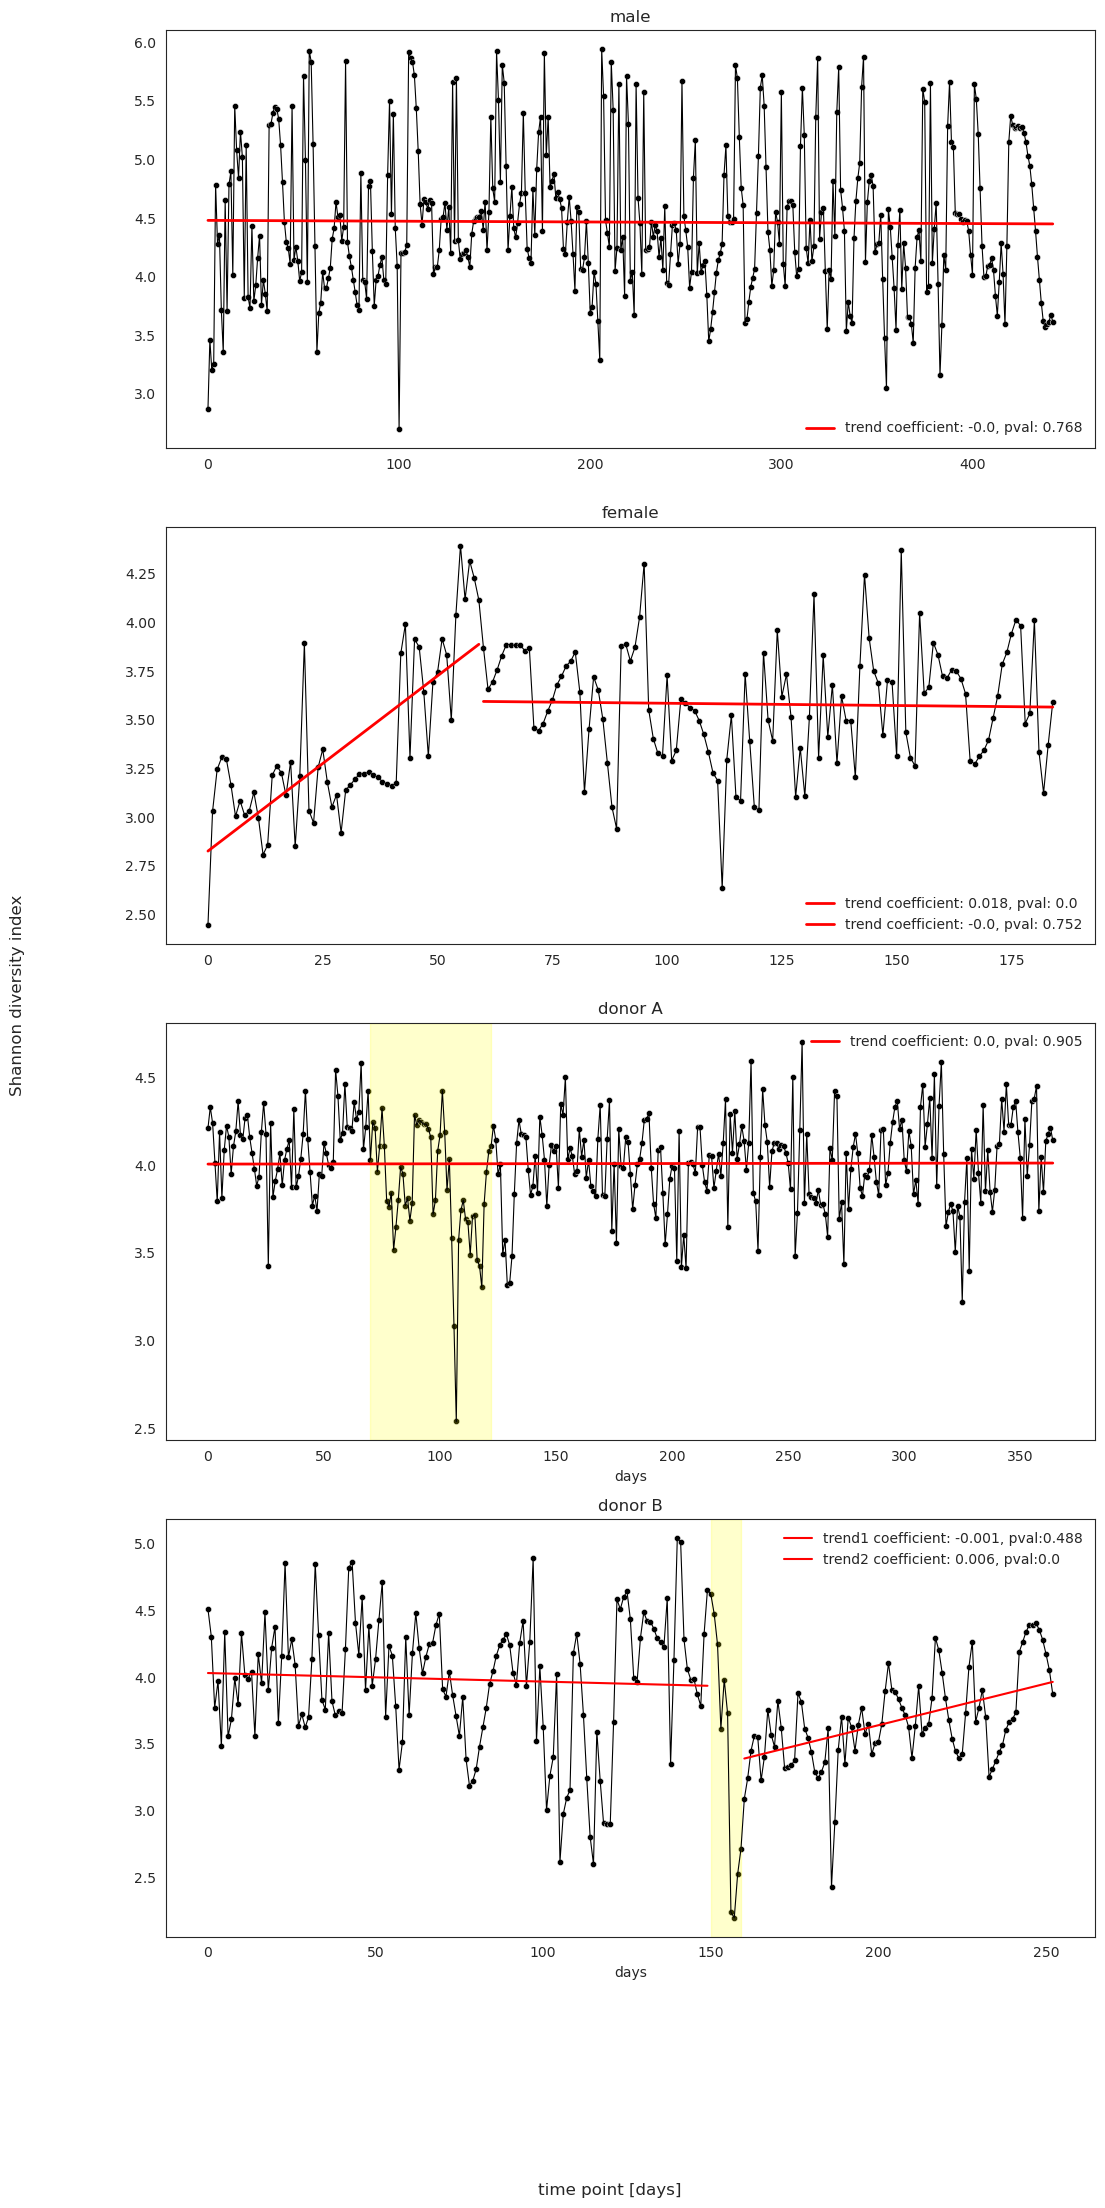

In [5]:
fig, axes = plt.subplots(4, 1, figsize = (10, 20))

sns.scatterplot(male_alpha_df.index.values, male_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[0])
sns.lineplot(male_alpha_df.index.values, male_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[0])
axes[0].plot(male_trend, 'r', lw=2, label=f'trend coefficient: {male_trend_coef[0]}, pval: {male_trend_coef[1]}')
axes[0].set_xlabel('')
axes[0].set_ylabel("")
axes[0].legend(edgecolor='w')
axes[0].set_title('male')


sns.scatterplot(female_alpha_df.index.values, female_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[1])
sns.lineplot(female_alpha_df.index.values, female_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[1])
axes[1].plot(female_trend1, 'r', lw=2, label=f'trend coefficient: {female_trend_coef1[0]}, pval: {female_trend_coef1[1]}')
axes[1].plot(female_trend_df.iloc[60:], 'r', lw=2, label=f'trend coefficient: {female_trend_coef2[0]}, pval: {female_trend_coef2[1]}')

axes[1].set_xlabel('')
axes[1].set_ylabel("")
axes[1].legend(edgecolor='w')
axes[1].set_title('female')


sns.scatterplot(donorA_alpha_df.index.values, donorA_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[2])
sns.lineplot(donorA_alpha_df.index.values, donorA_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[2])
axes[2].plot(donorA_trend, 'r', lw=2, label=f'trend coefficient: {donorA_trend_coef[0]}, pval: {donorA_trend_coef[1]}')
axes[2].axvspan(70, 122, alpha=0.2, color='yellow')
axes[2].set_xlabel('days')
axes[2].set_ylabel("")
axes[2].legend(edgecolor='w')
axes[2].set_title('donor A')

sns.scatterplot(donorB_alpha_df.index.values, donorB_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[3])
sns.lineplot(donorB_alpha_df.index.values, donorB_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[3])
axes[3].plot(donorB_trend1, 'r', lw=1.5, label=f'trend1 coefficient: {donorB_trend_coeff1[0]}, pval:{donorB_trend_coeff1[1]}')
axes[3].plot(donorB_trend_df.iloc[160:, 0], color='r', label=f'trend2 coefficient: {donorB_trend_coeff2[0]}, pval:{donorB_trend_coeff2[1]}')
axes[3].axvspan(150, 159, alpha=0.2, color='yellow')

axes[3].set_xlabel('days')
axes[3].set_ylabel("")
axes[3].legend(edgecolor='w')
axes[3].set_title('donor B')
fig.text(0.5, -0.1, 'time point [days]', ha='center', fontsize=12)
fig.text(-0.1, 0.5, "Shannon diversity index", va='center', rotation='vertical', fontsize=12)
plt.tight_layout()

# II. Faith's PD index

In [6]:
#faiths
wd =  './data/alpha_diversity/faiths_pd/'

male_alpha_df = pd.read_csv(wd + 'male_faiths_pd.csv')
female_alpha_df = pd.read_csv(wd + 'female_faiths_pd.tsv', sep='\t', index_col = [0])#.iloc[40:].reset_index(drop=True)
donorA_alpha_df = pd.read_csv(wd + 'donorA_faiths_pd.tsv', sep='\t', index_col = [0])
donorB_alpha_df = pd.read_csv(wd + 'donorB_faiths_pd.tsv', sep='\t', index_col = [0])

datasets = [male_alpha_df, female_alpha_df, donorA_alpha_df, donorB_alpha_df]
subjects = ['male', 'female', 'donorA', 'donorB']

In [7]:
male_trend, male_trend_coef = get_trend(male_alpha_df)

female_trend1, female_trend_coef1 = get_trend(female_alpha_df.iloc[:60])
female_trend2, female_trend_coef2 = get_trend(female_alpha_df.iloc[60:])
female_trend_df = pd.DataFrame(female_trend1).append(pd.DataFrame(female_trend2))
female_trend_df.index = np.arange(0, len(female_alpha_df))

female_trend = get_trend(female_alpha_df)
female_trend = pd.DataFrame(female_trend[0]).values

donorA_trend, donorA_trend_coef = get_trend(donorA_alpha_df)

donorB_trend1, donorB_trend_coeff1 = get_trend(donorB_alpha_df[:150])
donorB_trend2, donorB_trend_coeff2 = get_trend(donorB_alpha_df[150:])
donorB_trend_df = pd.DataFrame(donorB_trend1).append(pd.DataFrame(donorB_trend2))
donorB_trend_df.index = np.arange(0, len(donorB_trend_df))

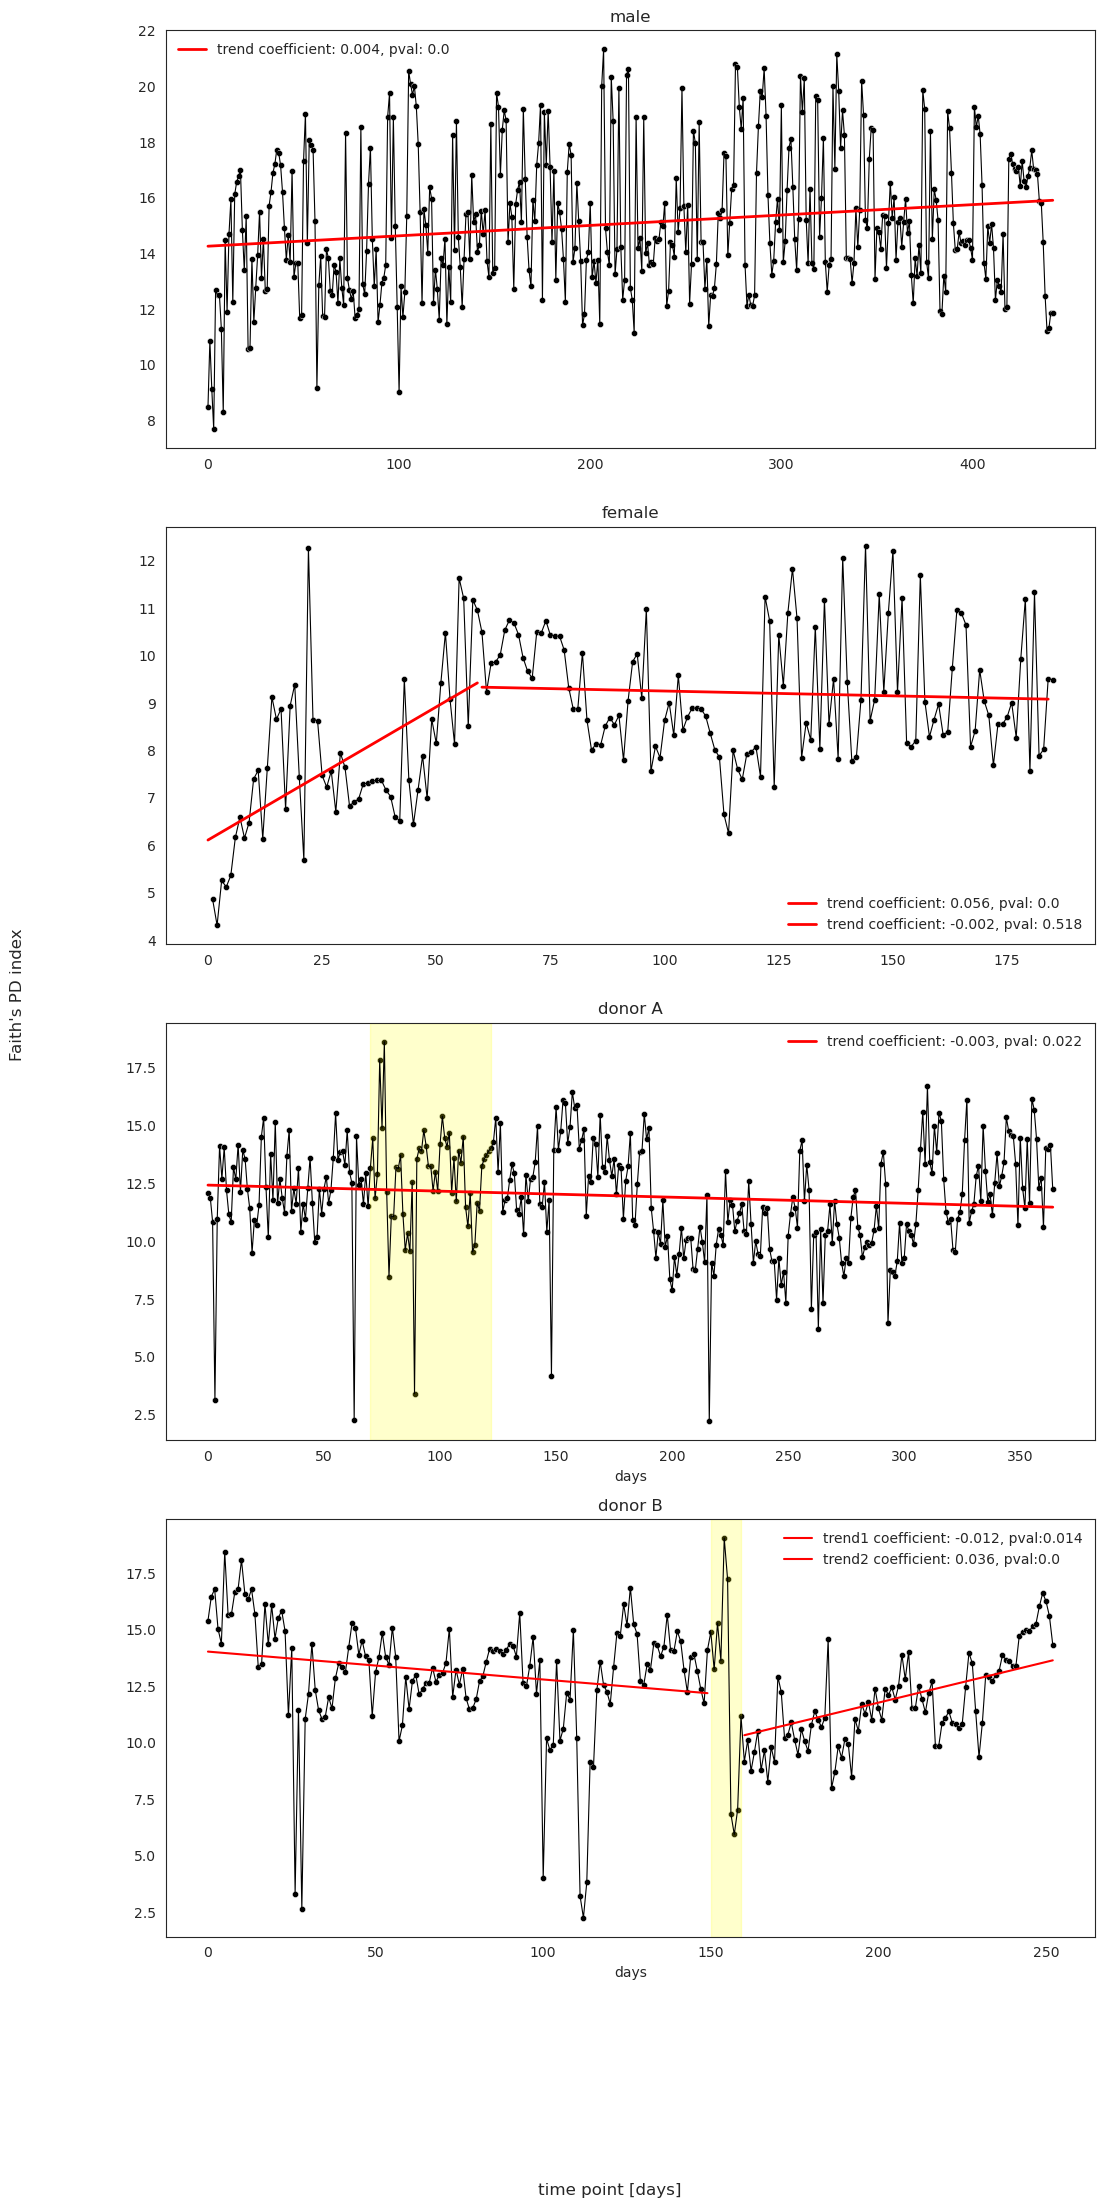

In [8]:
fig, axes = plt.subplots(4, 1, figsize = (10, 20))

sns.scatterplot(male_alpha_df.index.values, male_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[0])
sns.lineplot(male_alpha_df.index.values, male_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[0])
axes[0].plot(male_trend, 'r', lw=2, label=f'trend coefficient: {male_trend_coef[0]}, pval: {male_trend_coef[1]}')
axes[0].set_xlabel('')
axes[0].set_ylabel("")
axes[0].legend(edgecolor='w')
axes[0].set_title('male')


sns.scatterplot(female_alpha_df.index.values, female_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[1])
sns.lineplot(female_alpha_df.index.values, female_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[1])
axes[1].plot(female_trend1, 'r', lw=2, label=f'trend coefficient: {female_trend_coef1[0]}, pval: {female_trend_coef1[1]}')
axes[1].plot(female_trend_df.iloc[60:], 'r', lw=2, label=f'trend coefficient: {female_trend_coef2[0]}, pval: {female_trend_coef2[1]}')

axes[1].set_xlabel('')
axes[1].set_ylabel("")
axes[1].legend(edgecolor='w')
axes[1].set_title('female')


sns.scatterplot(donorA_alpha_df.index.values, donorA_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[2])
sns.lineplot(donorA_alpha_df.index.values, donorA_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[2])
axes[2].plot(donorA_trend, 'r', lw=2, label=f'trend coefficient: {donorA_trend_coef[0]}, pval: {donorA_trend_coef[1]}')
axes[2].axvspan(70, 122, alpha=0.2, color='yellow')
axes[2].set_xlabel('days')
axes[2].set_ylabel("")
axes[2].legend(edgecolor='w')
axes[2].set_title('donor A')

sns.scatterplot(donorB_alpha_df.index.values, donorB_alpha_df.iloc[:, 0].values, s=20, color='k', ax=axes[3])
sns.lineplot(donorB_alpha_df.index.values, donorB_alpha_df.iloc[:, 0].values, lw=.8, color='k', ax=axes[3])
axes[3].plot(donorB_trend1, 'r', lw=1.5, label=f'trend1 coefficient: {donorB_trend_coeff1[0]}, pval:{donorB_trend_coeff1[1]}')
axes[3].plot(donorB_trend_df.iloc[160:, 0], color='r', label=f'trend2 coefficient: {donorB_trend_coeff2[0]}, pval:{donorB_trend_coeff2[1]}')
axes[3].axvspan(150, 159, alpha=0.2, color='yellow')

axes[3].set_xlabel('days')
axes[3].set_ylabel("")
axes[3].legend(edgecolor='w')
axes[3].set_title('donor B')
fig.text(0.5, -0.1, 'time point [days]', ha='center', fontsize=12)
fig.text(-0.1, 0.5, "Faith's PD index", va='center', rotation='vertical', fontsize=12)
fig.tight_layout()